<center><h1>Data Science Assignment - 2021 Summer Internship</h1><br><h3>Kareem Wright</h3></center>

Basic prep work to navigate data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'D:\Documents\Projects\WW\vehicles.csv',low_memory=False)

In [3]:
vehicles=df.copy()

In [4]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
columns=vehicles.columns.values.tolist()
columns

['barrels08',
 'barrelsA08',
 'charge120',
 'charge240',
 'city08',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'co2TailpipeGpm',
 'comb08',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'cylinders',
 'displ',
 'drive',
 'engId',
 'eng_dscr',
 'feScore',
 'fuelCost08',
 'fuelCostA08',
 'fuelType',
 'fuelType1',
 'ghgScore',
 'ghgScoreA',
 'highway08',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'id',
 'lv2',
 'lv4',
 'make',
 'model',
 'mpgData',
 'phevBlended',
 'pv2',
 'pv4',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'trany',
 'UCity',
 'UCityA',
 'UHighway',
 'UHighwayA',
 'VClass',
 'year',
 'youSaveSpend',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'charge240b',
 'c240bDscr',
 'createdOn',
 'modifiedOn',
 'startStop',
 '

<center><h1>Question 1</h1>
    <h3>Which manufacturer produces the most fuel efficient fleet of cars?</h3></center>
    We will assume fleet describes all vehicles sold by any one make.<br>
    Fuel efficiency is meaured as a 50/50 mix of city and highway mpg from the makes average of those figures for all models.

In [6]:
mpg=vehicles[['make','UCity','UHighway']].groupby('make').mean()
mpg['combined']=(mpg['UCity']+mpg['UHighway'])/2
mpg.sort_values('combined',ascending=False).head(10)

,UCity,UHighway,combined
make,,,
Tesla,127.505172,132.462069,129.983621
CODA Automotive,110.300000,97.000000,103.650000
BYD,95.778233,97.161133,96.469683
smart,92.472678,86.538689,89.505683
Azure Dynamics,88.400000,88.600000,88.500000
Fiat,46.368923,57.319992,51.844458
Daihatsu,36.320259,45.823529,41.071894
MINI,32.563635,47.243552,39.903594
Scion,33.570267,45.666564,39.618415


After the intial run we quickly found that in order to find a way to exclude vehicles which aren't propelled using fossil fuels.<br>
We settled on using the number of cylinders the engine has as a means to exclude electric only vehicles which do not burn fuel for propulsion.

In [7]:
print(vehicles['cylinders'].unique())
cyl=vehicles[['make','cylinders']]
cyl[cyl['cylinders'].isnull()]

[ 4. 12.  8.  6.  5. 10.  2.  3. nan 16.]


,make,cylinders
7138,Nissan,NaN
7139,Toyota,NaN
8143,Toyota,NaN
8144,Ford,NaN
8146,Ford,NaN
...,...,...
32935,Fiat,NaN
33032,Honda,NaN
33409,Hyundai,NaN
33410,Tesla,NaN


In [8]:
mpg=vehicles[['make','UCity','UHighway','cylinders']]
print(len(mpg))
mpg=mpg[mpg['cylinders'].notnull()]
print(len(mpg))
mpg['combined']=(mpg['UCity']+mpg['UHighway'])/2
mpg.groupby('make').mean().sort_values('combined',ascending=False).head(10)

40081
39910


,UCity,UHighway,cylinders,combined
make,,,,
smart,44.271018,58.226400,3.000000,51.248709
Daihatsu,36.320259,45.823529,3.705882,41.071894
Fiat,33.401924,47.780037,4.000000,40.590981
MINI,32.280748,47.029576,3.856436,39.655162
Grumman Olson,36.805550,41.500000,4.000000,39.152775
Geo,33.216201,43.219173,3.748299,38.217687
Scion,31.594281,44.412881,4.000000,38.003581
Honda,31.191938,43.623589,4.369295,37.407764
Renault,28.619046,40.436354,4.000000,34.527700


<h3>Answer</h3>
Based on the criteria set forth above we found that Smart produces the most fuel efficient fleet of vehicles.

<center><h1>Question 2</h1>
    <h3>Build a model to predict city mpg (variable “UCity” in column BG).</h3></center>

Initially we assumed which variables would be useful. <br>
We attempted to run the model using those however quickly realized this this would proof fruitless.

In [9]:
gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV[['cylinders','displ','evMotor','eng_dscr','co2','co2A','drive','VClass','guzzler','year']].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]

display(X.describe())

,cylinders,displ,evMotor,eng_dscr,co2,co2A,drive,VClass,guzzler,year
count,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000,39910.000000
mean,1.649887,18.359008,-0.734954,81.000000,35.016387,1.088073,1.086645,9.042646,-0.904660,17.941619
std,1.451988,14.886620,3.231232,142.488425,89.251244,10.953890,1.256643,8.557988,0.398204,10.238573
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
25%,0.000000,6.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,3.000000,-1.000000,10.000000
50%,2.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,-1.000000,19.000000
75%,3.000000,26.000000,-1.000000,109.000000,0.000000,0.000000,2.000000,14.000000,-1.000000,27.000000
max,8.000000,64.000000,71.000000,547.000000,531.000000,190.000000,7.000000,33.000000,2.000000,35.000000


In [10]:
from sklearn import linear_model
import statsmodels.api as sm

gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV[['cylinders','displ','eng_dscr','co2','co2A','drive','VClass','guzzler','year']].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]
       
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
ncylinders=4
ndispl=18
neng_dscr=300
nco2=55
nco2A=100
ndrive=6
nVClass=14
nguzzler=1
nyear=2017
print ('Predicted UCity mpg: \n', regr.predict([[ncylinders, ndispl, neng_dscr, nco2, nco2A, ndrive, 
                                                         nVClass, nguzzler, nyear]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [20.22290953]
Coefficients: 
 [[-1.61058098e+00 -7.62958816e-03  1.64457926e-04  1.77545463e-02
  -2.58571505e-02  4.48593980e-02 -1.90505642e-01 -5.13258712e+00
   8.27801635e-02]]
Predicted UCity mpg: 
 [[171.52045536]]
                            OLS Regression Results                            
Dep. Variable:                  UCity   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2445.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:54:26   Log-Likelihood:            -1.2411e+05
No. Observations:               39910   AIC:                         2.482e+05
Df Residuals:                   39900   BIC:                         2.483e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                 

In [11]:
from sklearn import linear_model
import statsmodels.api as sm

gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV[['cylinders','displ','co2','co2A','year']].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]
       
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
ncylinders=4
ndispl=18
nco2=55
nco2A=100
nyear=2017
print ('Predicted UCity mpg: \n', regr.predict([[ncylinders, ndispl, nco2, nco2A, nyear]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [24.50966016]
Coefficients: 
 [[-1.71223251 -0.04887253  0.01517382 -0.02723408  0.06676429]]
Predicted UCity mpg: 
 [[149.55574547]]
                            OLS Regression Results                            
Dep. Variable:                  UCity   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2587.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:54:26   Log-Likelihood:            -1.2727e+05
No. Observations:               39910   AIC:                         2.546e+05
Df Residuals:                   39904   BIC:                         2.546e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
data=vehicles.copy()
data=data[data['cylinders'].notnull()]
data['is_train'] = np.random.uniform(0,1, len(data)) <= .75
train, test = data[data['is_train']==True], data[data['is_train']==False]

# Create linear regression object
regr = linear_model.LinearRegression()

xTrain=train[['cylinders','displ','co2','co2A','year']].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
yTrain=train[['UCity']]

xTest=test[['cylinders','displ','co2','co2A','year']].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
yTest=test[['UCity']]


# Train the model using the training sets
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
y_pred = regr.predict(xTest)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(yTest, y_pred))

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Coefficients: 
 [[-0.87732253 -2.58435684  0.00296203 -0.00271986  0.1029695 ]]
Mean squared error: 20.25
Coefficient of determination: 0.56
                            OLS Regression Results                            
Dep. Variable:                  UCity   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2587.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:54:26   Log-Likelihood:            -1.2727e+05
No. Observations:               39910   AIC:                         2.546e+05
Df Residuals:                   39904   BIC:                         2.546e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

Seeing these rather high intercepts along side wildly varying predicted figures we <br>
decided to use every variable but eliminating those having a P value higher than 0.05.<br>
This required a few iterations but was well worth the added accuracy of our predictions.

In [13]:
from sklearn import linear_model
import statsmodels.api as sm

gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV.drop(columns='UCity').copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]
       
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [13.246084]
Coefficients: 
 [[ 1.58582843e-01 -7.50087222e-02 -1.17113556e-12  3.26586067e-01
   1.95476812e-01  1.07893211e-05  2.93066321e-01  1.52024784e-02
   3.19502073e-01 -2.53456970e-01 -2.19498456e-01  7.92784518e-03
   5.70170900e-02 -5.72586654e-02 -7.22742509e-03 -1.82409918e-01
   3.46894903e-04  1.50768694e-01  4.65527021e-03 -2.06731063e-01
  -1.78980431e+00 -7.84023260e-02 -1.36025096e+00 -2.42793998e-02
   4.48743208e-02 -2.94612980e-05 -5.18993932e-04  4.82955073e-01
  -1.53077656e-01 -2.15708490e-01  1.18548532e-01 -1.81149163e+00
  -5.49683683e-01 -1.31207679e-01  6.54797757e-02 -3.37506740e-04
   2.66937790e-01 -1.07558764e-02 -4.07172260e-01 -3.33770899e-01
   1.44091850e-03  1.15454065e-01  8.52812621e-02 -3.57604054e-05
   8.01070146e-02  7.68540456e-02  1.18590937e-02  3.60772465e-04
  -1.55637768e+00  4.37864198e+00  2.58518952e-02  3.87553793e-02
  -9.65894031e-15  4.27990976e-14 -6.63980290e-01 -8.88178420e-15
   4.69248428e-01  5.18594233e-02 -

In [14]:
from sklearn import linear_model
import statsmodels.api as sm

gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV[["atvType","barrels08","c240Dscr","charge120","charge240","city08","cityA08","cityA08U","cityE","cityUF","co2","co2A","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U","combA08","combE","combinedCD","cylinders","displ","eng_dscr","evMotor","feScore","fuelCost08","fuelCostA08","fuelType1","fuelType2","ghgScore","guzzler","highway08","highway08U","highwayA08","highwayE","hlv","hpv","id","lv2","lv4","make","mfrCode","model","modifiedOn","mpgData","phevBlended","phevCity","phevComb","phevHwy","pv2","pv4","rangeA","rangeCityA","rangeHwyA","sCharger","startStop","tCharger","trans_dscr","trany","UCityA","UHighway","VClass","year"]].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]
       
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [13.6553683]
Coefficients: 
 [[ 2.85912340e+00  1.58210349e-01 -3.17935712e-11  1.97359386e-11
   4.28786507e-01  1.96247291e-01  2.61595425e-01  8.87427681e-03
  -1.49248830e-01 -2.55761920e-01  8.02917176e-03  5.66276393e-02
  -5.95962797e-02 -7.36271147e-03 -1.79639791e-01  3.28387738e-04
   6.49116884e-02 -2.56157076e-01 -1.38411095e+00 -1.36198139e+00
  -2.45277764e-02 -5.05806390e-04  2.01670231e-01  5.47548047e-01
   1.49976322e-02 -2.24633996e-01 -1.64983599e+00 -8.32927957e+00
  -6.11241258e-01 -4.05706945e+00  6.56797770e-02 -3.14601488e-04
   2.55307983e-01 -3.65142724e-01  1.15491275e-01  8.49783034e-02
  -3.60128202e-05  8.03555732e-02  7.72606153e-02  1.16885478e-02
  -3.26811288e-02  3.57964687e-04  2.09467508e-02 -1.56397748e+00
   3.08005191e+00  3.49853130e-01  1.86576401e-01 -1.03502282e-01
   2.54778948e-02  3.87800593e-02 -9.68039833e-03 -6.10190714e-01
   3.60629682e-01 -5.20484233e-01  1.41552037e+00 -4.10182459e-01
  -2.83871805e-02  5.29522416e-02 

In [15]:
from sklearn import linear_model
import statsmodels.api as sm

gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV[["atvType","barrels08","c240Dscr","charge120","charge240","city08","cityA08","cityA08U","cityE","cityUF","co2","co2A","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U","combE","combinedCD","cylinders","displ","eng_dscr","evMotor","feScore","fuelCost08","fuelCostA08","fuelType1","fuelType2","ghgScore","guzzler","highway08","highway08U","highwayA08","highwayE","hlv","hpv","id","lv2","lv4","make","mfrCode","model","modifiedOn","mpgData","phevBlended","phevCity","phevComb","pv2","pv4","rangeA","rangeCityA","rangeHwyA","sCharger","startStop","tCharger","trans_dscr","trany","UCityA","UHighway","VClass","year"]].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]
       
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [13.72342363]
Coefficients: 
 [[ 2.86815912e+00  1.58285863e-01 -4.97657089e-11  5.06546888e-12
   4.19191144e-01  1.96152000e-01  2.50889733e-01  8.51743062e-03
  -1.43180789e-01 -2.48903286e-01  8.02880522e-03  5.47703217e-02
  -5.71780348e-02 -7.36865480e-03 -1.79907090e-01  3.29673658e-04
  -2.51329210e-01 -1.50273689e+00 -1.36211087e+00 -2.45831820e-02
  -5.07046128e-04  1.99720195e-01  5.16159181e-01  1.50706615e-02
  -1.94129623e-01 -1.65242390e+00 -8.27080245e+00 -5.79513762e-01
  -4.05537578e+00  6.58037855e-02 -3.16095107e-04  2.66647925e-01
  -3.67046580e-01  1.15613054e-01  8.49653389e-02 -3.60334924e-05
   8.05558053e-02  7.71716986e-02  1.16987080e-02 -3.27018200e-02
   3.58159209e-04  2.09526533e-02 -1.56350563e+00  3.48270883e+00
   3.49288821e-01  1.95080712e-01  2.54325071e-02  3.88043282e-02
  -9.91819320e-03 -6.20255748e-01  3.59744023e-01 -5.17998896e-01
   1.41329095e+00 -4.08698565e-01 -2.84197003e-02  5.30501097e-02
  -7.89560121e-03  4.26864058e-04

In [16]:
from sklearn import linear_model
import statsmodels.api as sm

gasV=vehicles[vehicles['cylinders'].notnull()]
X=gasV[["atvType","barrels08","charge240","city08","cityA08","cityA08U","cityE",
     "cityUF","co2","co2A","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U","combE","combinedCD",
     "cylinders","displ","eng_dscr","evMotor","feScore","fuelCost08","fuelCostA08","fuelType1","fuelType2",
     "ghgScore","guzzler","highway08","highway08U","highwayA08","highwayE","hlv","hpv","lv2","lv4",
     "make","phevBlended","phevCity","phevComb","pv2","pv4",
     "rangeA","rangeCityA","rangeHwyA","sCharger","startStop","tCharger","trans_dscr","trany","UCityA",
     "UHighway","VClass","year"]].copy()
Xcolumns=X.columns.values.tolist()
for fc in Xcolumns:
    X[fc]= pd.factorize(X[fc])[0]
Y=gasV[['UCity']]
       
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [12.46421943]
Coefficients: 
 [[ 2.91457039e+00  1.56947972e-01  3.61736340e-01  2.01112594e-01
   2.45696976e-01  8.47226526e-03 -1.30061951e-01 -2.40884288e-01
   1.12678572e-02  5.66960745e-02 -6.01658307e-02 -1.06462200e-02
  -1.82208866e-01  4.71884292e-04 -2.61203658e-01 -1.61959430e+00
  -1.37922204e+00 -2.40385049e-02 -8.74201896e-04  2.03309153e-01
   5.13729233e-01  1.93612044e-02 -2.01298090e-01 -1.63636410e+00
  -8.20801850e+00 -5.68313980e-01 -4.19987020e+00  6.45756427e-02
  -4.61793955e-04  2.80301626e-01 -3.54161879e-01  1.25621937e-01
   8.29307091e-02  8.16978384e-02  7.53526413e-02  1.24770488e-02
   3.91260408e+00  3.44324604e-01  1.89719217e-01  2.56195516e-02
   4.69942328e-02 -1.02638383e-02 -6.44374485e-01  3.92180087e-01
  -7.05377495e-01  1.47221373e+00 -3.59022364e-01 -1.69036097e-02
   7.25097252e-02 -8.70238435e-03  5.42066401e-04 -1.30021334e-01
   2.05541794e-02]]
                            OLS Regression Results                            


Here we found the minimum and maximum values of each variable to then test the model using random values <br>
some of the final variables were excluded from this due to there ability to skew towards or away from one <br>
company due to the history of that make.

In [17]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

pd.set_option("max_columns", None)
X.apply(minMax)

,const,atvType,barrels08,charge240,city08,cityA08,cityA08U,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combE,combinedCD,cylinders,displ,eng_dscr,evMotor,feScore,fuelCost08,fuelCostA08,fuelType1,fuelType2,ghgScore,guzzler,highway08,highway08U,highwayA08,highwayE,hlv,hpv,lv2,lv4,make,phevBlended,phevCity,phevComb,pv2,pv4,rangeA,rangeCityA,rangeHwyA,sCharger,startStop,tCharger,trans_dscr,trany,UCityA,UHighway,VClass,year
min,1.0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0,0,0,0,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,-1,-1,-1,-1,0,0,0,0
max,1.0,6,159,17,51,57,483,35,61,531,190,209,616,48,5189,36,8,8,64,547,71,10,60,33,4,3,10,2,49,3793,57,30,39,51,28,52,130,1,33,37,66,75,222,67,65,0,1,0,51,36,507,7333,33,35


In [18]:
import numpy as np

reg=["atvType","barrels08","charge240","city08","cityA08","cityA08U","cityE",
     "cityUF","co2","co2A","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U","combE","combinedCD",
     "cylinders","displ","eng_dscr","evMotor","feScore","fuelCost08","fuelCostA08","fuelType1","fuelType2",
     "ghgScore","guzzler","highway08","highway08U","highwayA08","highwayE","hlv","hpv","lv2","lv4",
     "make","phevBlended","phevCity","phevComb","pv2","pv4",
     "rangeA","rangeCityA","rangeHwyA","sCharger","startStop","tCharger","trans_dscr","trany","UCityA",
     "UHighway","VClass","year"]
print('There are ',len(reg),' variables for this final model!')

# prediction with sklearn
atvType=np.random.randint(-1,7)
barrels08=np.random.randint(0,160)
#c240Dscr=np.random.randint(0,0)
#charge120=np.random.randint(0,0)
charge240=np.random.randint(0,18)
city08=np.random.randint(0,52)
cityA08=np.random.randint(0,58)
cityA08U=np.random.randint(0,483)
cityE=np.random.randint(0,36)
cityUF=np.random.randint(0,62)
co2=np.random.randint(0,532)
co2A=np.random.randint(0,191)
co2TailpipeAGpm=np.random.randint(0,210)
co2TailpipeGpm=np.random.randint(0,617)
comb08=np.random.randint(0,48)
comb08U=np.random.randint(0,5190)
combE=np.random.randint(0,37)
combinedCD=np.random.randint(0,9)
cylinders=np.random.randint(0,9)
displ=np.random.randint(0,65)
eng_dscr=np.random.randint(-1,548)
evMotor=np.random.randint(-1,72)
feScore=np.random.randint(0,11)
fuelCost08=np.random.randint(0,61)
fuelCostA08=np.random.randint(0,34)
fuelType1=np.random.randint(0,4)
fuelType2=np.random.randint(-1,4)
ghgScore=np.random.randint(0,11)
guzzler=np.random.randint(-1,3)
highway08=np.random.randint(0,50)
highway08U=np.random.randint(0,3794)
highwayA08=np.random.randint(0,58)
highwayE=np.random.randint(0,31)
hlv=np.random.randint(0,40)
hpv=np.random.randint(0,52)
#id=np.random.randint(0,0)
lv2=np.random.randint(0,29)
lv4=np.random.randint(0,53)
make=np.random.randint(0,131)
#mfrCode=np.random.randint(0,0)
#model=np.random.randint(0,0)
#modifiedOn=np.random.randint(0,0)
#mpgData=np.random.randint(0,0)
phevBlended=np.random.randint(0,2)
phevCity=np.random.randint(0,34)
phevComb=np.random.randint(0,38)
pv2=np.random.randint(0,67)
pv4=np.random.randint(0,76)
rangeA=np.random.randint(-1,223)
rangeCityA=np.random.randint(0,68)
rangeHwyA=np.random.randint(0,66)
sCharger=np.random.randint(-1,1)
startStop=np.random.randint(-1,2)
tCharger=np.random.randint(-1,1)
trans_dscr=np.random.randint(-1,52)
trany=np.random.randint(-1,37)
UCityA=np.random.randint(0,507)
UHighway=np.random.randint(0,7334)
VClass=np.random.randint(0,34)
year=np.random.randint(0,36)

print(atvType,barrels08,charge240,city08,cityA08,cityA08U,cityE,
     cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combE,combinedCD,
     cylinders,displ,eng_dscr,evMotor,feScore,fuelCost08,fuelCostA08,fuelType1,fuelType2,
     ghgScore,guzzler,highway08,highway08U,highwayA08,highwayE,hlv,hpv,lv2,lv4,
     make,phevBlended,phevCity,phevComb,pv2,pv4,
     rangeA,rangeCityA,rangeHwyA,sCharger,startStop,tCharger,trans_dscr,trany,UCityA,
     UHighway,VClass,year)

print('\n')

print ('Predicted UCity mpg: \n', regr.predict([[atvType,barrels08,charge240,city08,cityA08,cityA08U,cityE,
     cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combE,combinedCD,
     cylinders,displ,eng_dscr,evMotor,feScore,fuelCost08,fuelCostA08,fuelType1,fuelType2,
     ghgScore,guzzler,highway08,highway08U,highwayA08,highwayE,hlv,hpv,lv2,lv4,
     make,phevBlended,phevCity,phevComb,pv2,pv4,
     rangeA,rangeCityA,rangeHwyA,sCharger,startStop,tCharger,trans_dscr,trany,UCityA,
     UHighway,VClass,year]]))
'''
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
'''

There are  53  variables for this final model!
1 103 14 39 4 411 9 37 334 107 151 482 39 4560 9 0 2 53 48 32 7 35 7 1 3 7 0 9 2442 46 18 23 25 15 10 45 1 22 37 18 36 60 14 6 -1 -1 -1 25 3 474 375 9 12


Predicted UCity mpg: 
 [[23.59318254]]


'\n# with statsmodels\nX = sm.add_constant(X) # adding a constant\n \nmodel = sm.OLS(Y, X).fit()\npredictions = model.predict(X) \n \nprint_model = model.summary()\nprint(print_model)\n'

<center><h1>Question 3</h1>
    <h3>How has fuel economy changed over time? Are there any other interesting insights or trends?
</h3></center>

In general fuel economy has improved as time has progressed. Most notibly since 2008.  <br>
Manufactures have also maintained a wide variety of options which likely hasn't limited competition <br>
as consumers have many options for more fuel efficient vehicles.  The norm seems to continue to be <br>
4, 6, or 8 cylinder for engine options with the smaller engines being produced more often in recent years. <br>
Based on this we could expect more strides in fuel economy while retaining a level of variet that consumers <br>
have grown accustom to over the years.

In [19]:
temp=vehicles[vehicles['cylinders'].notnull()]
variables=temp[['UCity','cylinders','displ','eng_dscr','co2','co2A','drive','VClass','guzzler','year']].copy()

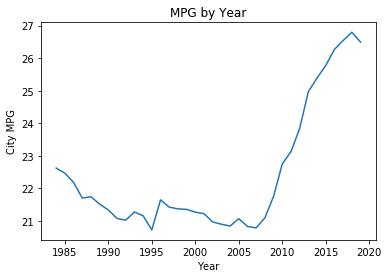

<Figure size 1152x648 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

v=variables
vt=v.groupby('year',as_index=False).mean()

plt.plot(vt['year'],vt['UCity'])
plt.title('MPG by Year')
plt.ylabel('City MPG')
plt.xlabel('Year')
plt.figure(figsize=(16,9))
plt.show()

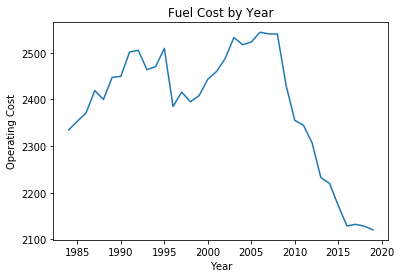

<Figure size 1152x648 with 0 Axes>

In [21]:
cost=temp.copy()
cost=cost.groupby('year',as_index=False).mean()
plt.plot(cost.year,cost.fuelCost08)
plt.title('Fuel Cost by Year')
plt.ylabel('Operating Cost')
plt.xlabel('Year')
plt.figure(figsize=(16,9))
plt.show()

[2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, nan, 16.0]


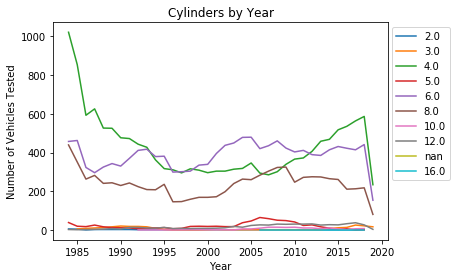

<Figure size 1152x648 with 0 Axes>

In [22]:
'''
c4=vehicles[vehicles['cylinders']==4]
c4=c4.groupby('year',as_index=False).count()
c4
plt.plot(c4['year'],c4['cylinders'])
'''
size=vehicles.cylinders.unique().tolist()
size.sort()
print(size)

i=0
for s in size:
    c=vehicles[vehicles['cylinders']==size[i]]
    c=c.groupby('year',as_index=False).count()
    plt.plot(c['year'],c['cylinders'],label=str(size[i]))
    #plt.show()
    i+=1
plt.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
plt.title('Cylinders by Year')
plt.ylabel('Number of Vehicles Tested')
plt.xlabel('Year')
plt.figure(figsize=(16,9))
plt.show()

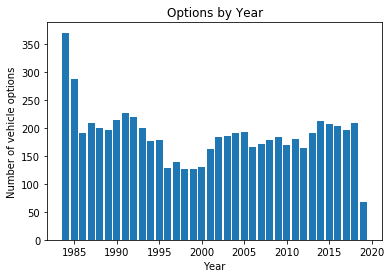

<Figure size 1152x648 with 0 Axes>

In [23]:
classes=vehicles.groupby(['year','VClass'],as_index=False).count()
plt.bar(classes.year,classes.make)
plt.title('Options by Year')
plt.ylabel('Number of vehicle options')
plt.xlabel('Year')
plt.figure(figsize=(16,9))
plt.show()

<h1>Independant</h1>

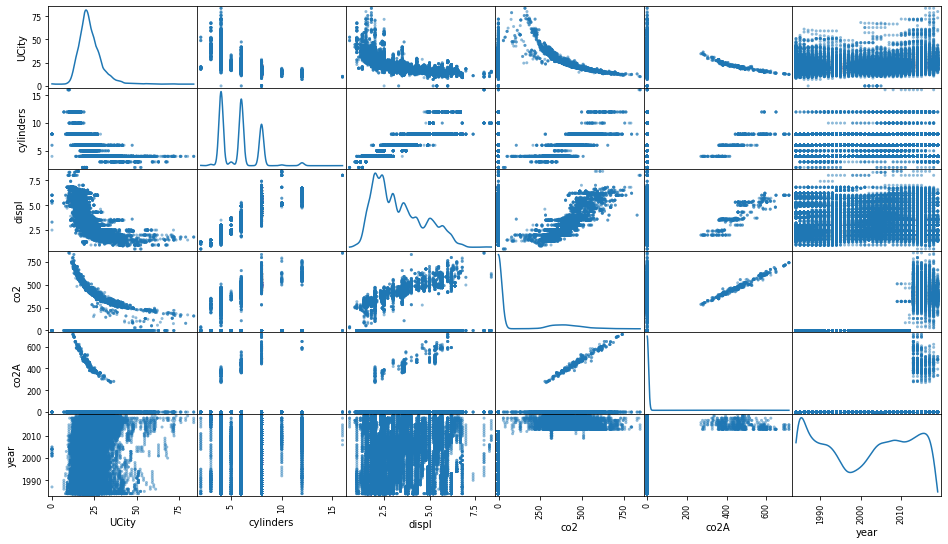

In [25]:
pd.plotting.scatter_matrix(variables,figsize=(16, 9),diagonal='kde')
plt.savefig(r"D:\Documents\Projects\WW\scatter.png",dpi=400)